In [1]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# ML models
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import XGBClassifier

# pipelines
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# import cleaned and transformed dataset
df = pd.read_csv("../data/clean_merged_df.csv")

df.columns

Index(['Unnamed: 0', 'Bail Status', 'Days in Court', 'Offence Location',
       'Date', 'Proceeding', 'Court', 'Offence Number', 'Offence', 'Election',
       'Discharge Available', 'SS Available', 'CSO Available',
       'Maximum (Summary)(Years)', 'Maximum (Indictable)(Years)', 'Has Lawyer',
       'Not in Custody', 'Custody Unknown', 'Is In Custody', 'Abbotsford',
       'New Westminster', 'North Vancouver', 'Port Coquitlam', 'Richmond',
       'Surrey', 'Vancouver', 'Victoria'],
      dtype='object')

In [3]:
df.drop(columns = ['Unnamed: 0', 'Bail Status', 'Offence Location',
                   'Date', 'Proceeding', 'Court', 'Offence Number',
                    'Offence'], inplace=True)

XB Classifier on unscaled data

In [4]:
# Split the data into features (X) and target (y)
X = df.drop('Has Lawyer', axis=1)
y = df['Has Lawyer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
df.dtypes

Days in Court                  int64
Election                       int64
Discharge Available            int64
SS Available                   int64
CSO Available                  int64
Maximum (Summary)(Years)       int64
Maximum (Indictable)(Years)    int64
Has Lawyer                     int64
Not in Custody                 int64
Custody Unknown                int64
Is In Custody                  int64
Abbotsford                     int64
New Westminster                int64
North Vancouver                int64
Port Coquitlam                 int64
Richmond                       int64
Surrey                         int64
Vancouver                      int64
Victoria                       int64
dtype: object

Run simple classification model

In [6]:
# Fit the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Accuracy: 0.738
Precision: 0.780
Recall: 0.810


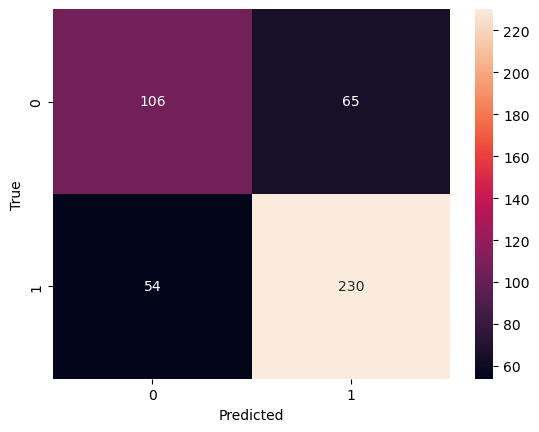

In [7]:
# Calculate the confusion matrix
confused = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(confused, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

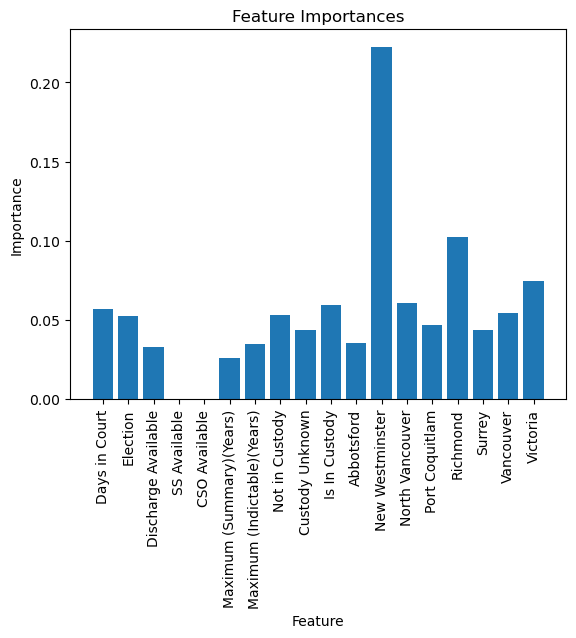

In [8]:
# Plot the feature importances
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.xticks(range(len(xgb_model.feature_importances_)), X_train.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

Surprising that New West and Victoria are the most important features.
* Perhaps there are just more lawyers there?

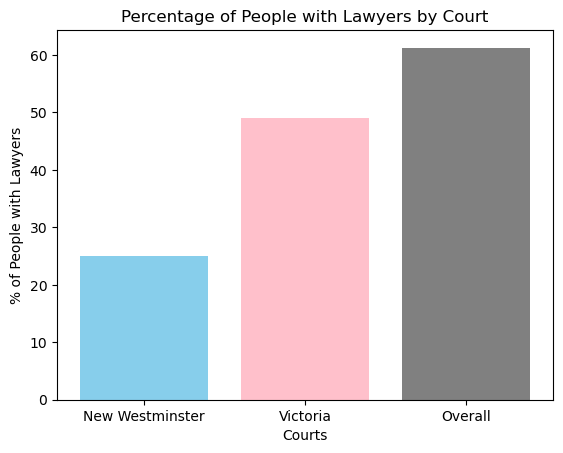

In [9]:
# Compute percentage of people with lawyers in New Westminster, Victoria, and overall
percentage_lawyers_nw = df['Has Lawyer'][df['New Westminster'] == 1].mean() * 100
percentage_lawyers_victoria = df['Has Lawyer'][df['Victoria'] == 1].mean() * 100
percentage_lawyers_overall = df['Has Lawyer'].mean() * 100

# Create bar chart
fig, ax = plt.subplots()
x_labels = ['New Westminster', 'Victoria', 'Overall']
pcts = [percentage_lawyers_nw, percentage_lawyers_victoria, percentage_lawyers_overall]
colors = ['skyblue', 'pink', 'gray']
ax.bar(x_labels, pcts, color=colors)

# Add labels and title
ax.set_xlabel('Courts')
ax.set_ylabel('% of People with Lawyers')
ax.set_title('Percentage of People with Lawyers by Court')

# Display plot
plt.show()

In [10]:
df2 = df.drop(columns = ['New Westminster', 'Richmond'])

In [11]:
# Split the data into features (X) and target (y)
X = df2.drop('Has Lawyer', axis=1)
y = df2['Has Lawyer']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Fit the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred = xgb_model.predict(X_test)

# Calculate accuracy, precision, recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# print results
print("Accuracy: {:.3f}".format(accuracy))
print("Precision: {:.3f}".format(precision))
print("Recall: {:.3f}".format(recall))

Accuracy: 0.727
Precision: 0.776
Recall: 0.792


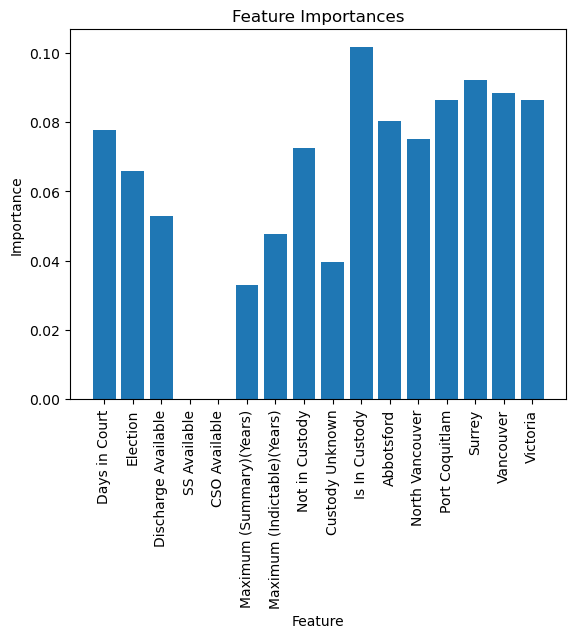

In [13]:
# Plot the feature importances
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.xticks(range(len(xgb_model.feature_importances_)), X_train.columns, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

Try scaling the data to see if it helps